# rf103_interprfuncs
Basic functionality: interpreted functions and pdfs




**Author:**  Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:16 AM.</small></i>

In [1]:
import ROOT

Generic interpreted pdf
------------------------------

Declare observable x

In [2]:
x = ROOT.RooRealVar("x", "x", -20, 20)

Construct generic pdf from interpreted expression
------------------------------------------------------

ROOT.To construct a proper pdf, the formula expression is explicitly normalized internally by dividing
it by a numeric integral of the expression over x in the range [-20,20]

In [3]:
alpha = ROOT.RooRealVar("alpha", "alpha", 5, 0.1, 10)
genpdf = ROOT.RooGenericPdf("genpdf", "genpdf", "(1+0.1*abs(x)+sin(sqrt(abs(x*alpha+0.1))))", [x, alpha])

Sample, fit and plot generic pdf
---------------------------------------------------------------

Generate a toy dataset from the interpreted pdf

In [4]:
data = genpdf.generate({x}, 10000)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


Fit the interpreted pdf to the generated data

In [5]:
genpdf.fitTo(data, PrintLevel=-1)

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Fitting -- RooAbsPdf::fitTo(genpdf_over_genpdf_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_genpdf_over_genpdf_Int[x]_genpdfData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Make a plot of the data and the pdf overlaid

In [6]:
xframe = x.frame(Title="Interpreted expression pdf")
data.plotOn(xframe)
genpdf.plotOn(xframe)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(genpdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


Standard pdf adjust with interpreted helper function
------------------------------------------------------------------------------------------------------------
Make a gauss(x,sqrt(mean2),sigma) from a standard ROOT.RooGaussian                                               #

Construct standard pdf with formula replacing parameter
------------------------------------------------------------------------------------------------------------

Construct parameter mean2 and sigma

In [7]:
mean2 = ROOT.RooRealVar("mean2", "mean^2", 10, 0, 200)
sigma = ROOT.RooRealVar("sigma", "sigma", 3, 0.1, 10)

Construct interpreted function mean = sqrt(mean^2)

In [8]:
mean = ROOT.RooFormulaVar("mean", "mean", "sqrt(mean2)", [mean2])

Construct a gaussian g2(x,sqrt(mean2),sigma)

In [9]:
g2 = ROOT.RooGaussian("g2", "h2", x, mean, sigma)

Generate toy data
---------------------------------

Construct a separate gaussian g1(x,10,3) to generate a toy Gaussian
dataset with mean 10 and width 3

In [10]:
g1 = ROOT.RooGaussian("g1", "g1", x, 10, 3)
data2 = g1.generate({x}, 1000)

Fit and plot tailored standard pdf
-------------------------------------------------------------------

Fit g2 to data from g1

In [11]:
r = g2.fitTo(data2, Save=True, PrintLevel=-1)  # ROOT.RooFitResult
r.Print()

[#1] INFO:Fitting -- RooAbsPdf::fitTo(g2_over_g2_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_g2_over_g2_Int[x]_g1Data) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization

  RooFitResult: minimized FCN value: 2551.39, estimated distance to minimum: 4.39288e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                 mean2    1.0010e+02 +/-  1.98e+00
                 sigma    3.1172e+00 +/-  7.12e-02



Plot data on frame and overlay projection of g2

In [12]:
xframe2 = x.frame(Title="Tailored Gaussian pdf")
data2.plotOn(xframe2)
g2.plotOn(xframe2)

Draw all frames on a canvas

In [13]:
c = ROOT.TCanvas("rf103_interprfuncs", "rf103_interprfuncs", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
xframe2.GetYaxis().SetTitleOffset(1.4)
xframe2.Draw()

c.SaveAs("rf103_interprfuncs.png")

Info in <TCanvas::Print>: png file rf103_interprfuncs.png has been created


Draw all canvases 

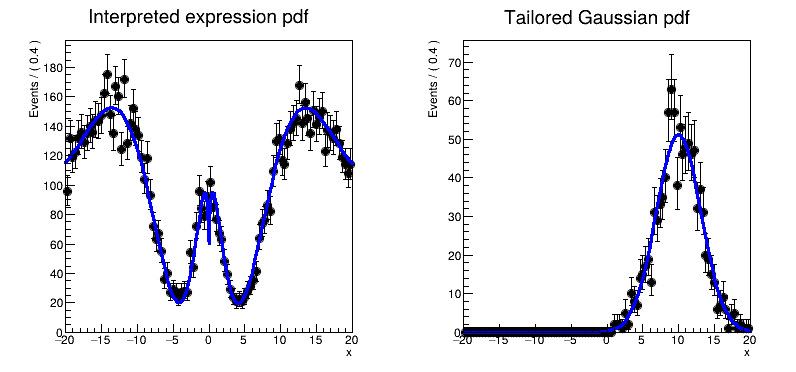

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()